<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/Perceptron_McIntosh_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

## Will McIntosh

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import sys, os
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
np.set_printoptions(threshold=sys.maxsize)
%matplotlib inline

## Download MNIST Dataset from Google Drive

## Get the Datasets

This will download the datasets from a google drive link, but only if the datasets haven't already been downloaded.

In [ ]:
if os.path.isfile("/content/mnist_train.csv") == False:
  !gdown --id 1JJGSIoxXtJLqXTZXEBiJJG5dp9zZDGGs

if os.path.isfile("/content/mnist_test.csv") == False:
  !gdown --id 1HpG3GuQFiknf1uEq2BbffPNLNINh7otH

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1JJGSIoxXtJLqXTZXEBiJJG5dp9zZDGGs
To: /content/mnist_train.csv
100% 110M/110M [00:00<00:00, 120MB/s] 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HpG3GuQFiknf1uEq2BbffPNLNINh7otH
To: /content/mnist_test.csv
100% 18.3M/18.3M [00:00<00:00, 194MB/s]


In [ ]:
train = pd.read_csv("/content/mnist_train.csv")
test = pd.read_csv("/content/mnist_test.csv")

# Cleaning Up Dataset

In [ ]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(60000, 785)

In [ ]:
test.shape

(10000, 785)

## Get Label Vectors

In [ ]:
# Gets the labeled data
trainTrueLabels = train['label']
testTrueLabels = test['label']
train.drop(['label'], axis=1, inplace=True)
test.drop(['label'], axis=1, inplace=True)

## Normalize Values

In [ ]:
def NormalizeDF(funcDF):
  x = funcDF.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  return pd.DataFrame(x_scaled)

# Normalizes dataset
train = NormalizeDF(train)
test = NormalizeDF(test)

# Converting to a numpy array matrix
train = train.to_numpy()
test = test.to_numpy()

## Create Bias Column

In [ ]:
bias = np.negative(np.ones((train.shape[0], 1)))
train = np.concatenate((bias, train), axis=1)
bias = np.negative(np.ones((test.shape[0], 1)))
test = np.concatenate((bias, test), axis=1)

# Calculating Loss

## Helper Function

In [ ]:
def Sigmoid(x):
  return 1/(1 + np.exp(-x))

## Training

In [ ]:
start_time = time.time()

# This vector is used for the confusion matrix, counting predicted values
testPredLabels = [1] * (test.shape[0])

# Creating the perceptron of random weights
W = np.random.uniform(-0.05,0.05,size=(train.shape[1],10))

# Iterating through the dataset
trainingAccuracies = []
testingAccuracies = []

# Parameters
eta = 0.001
epochCount = 70

for i in range(epochCount):

  # For plotting the training accuracy
  trainingCorrect = 0

  # Iterating through the training dataset
  for j, x in enumerate(train):

    # Create the x vector (row from training data)
    x = x.reshape((1,785))

    # Create the prediction vector (input applied to the weights)
    y = Sigmoid(np.dot(x,W)).reshape(10)

    # the label for this datapoint
    targetVal = trainTrueLabels[j]

    # Gets the pred value by finding the highest value
    predVal = np.argmax(y)

    if predVal == targetVal:
      trainingCorrect += 1

    # Creates a boolean vector, subtracts one from the target value index
    y[targetVal] -= 1
    y = y.reshape((10,1))

    # Delta weights    
    dW = np.dot(eta * y, x).T

    # Update weights
    W -= dW


  # For plotting the test accuracy
  testingCorrect = 0

  # Iterating through the test dataset
  for j, x in enumerate(test):
    
    # Create the x vector (row from training data)
    x = x.reshape((1,785))

    # Create the y vector (prediction vector, input applied to the weights)
    y = np.dot(x,W).reshape(10)

    # the label for this datapoint
    targetVal = testTrueLabels[j]

    # Get pred value by finding the highest value
    predVal = np.argmax(y)

    # Increases counter to keep track of accuracy
    if predVal == targetVal:
      testingCorrect += 1
    
    # Stores the predicted value in the test pred vector for confusion matrix
    testPredLabels[j] = predVal

  # Adding accuracies to the list for future plotting
  trainingAccuracies.append(trainingCorrect/train.shape[0])
  testingAccuracies.append(testingCorrect/test.shape[0])

print("--- %s seconds ---" % (time.time() - start_time))

--- 252.03256249427795 seconds ---


# Plotting Accuracy

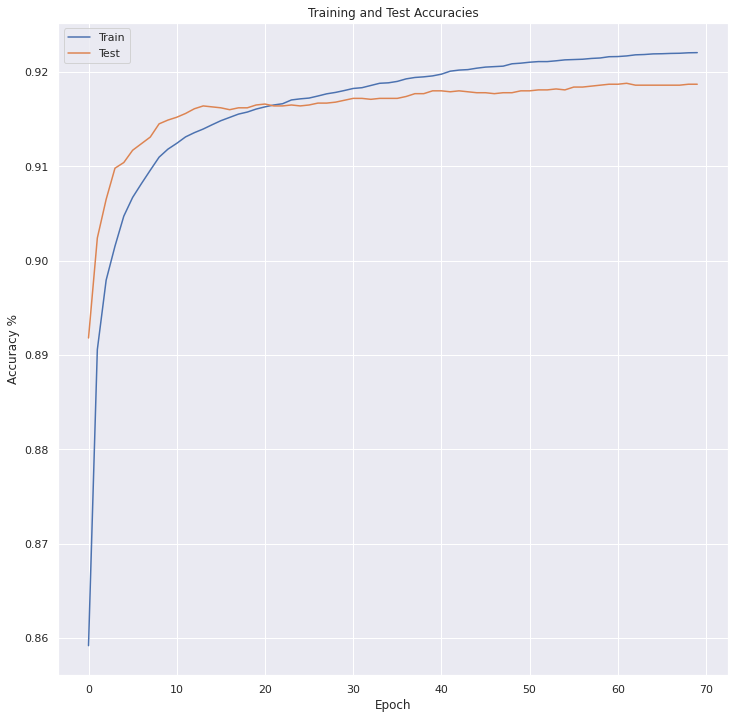

In [ ]:
sns.set(rc = {'figure.figsize':(12,12)})  #Edits size of chart
plt.plot(trainingAccuracies, label = "Train")
plt.plot(testingAccuracies, label = "Test")
plt.title("Training and Test Accuracies")
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()

# Heatmap

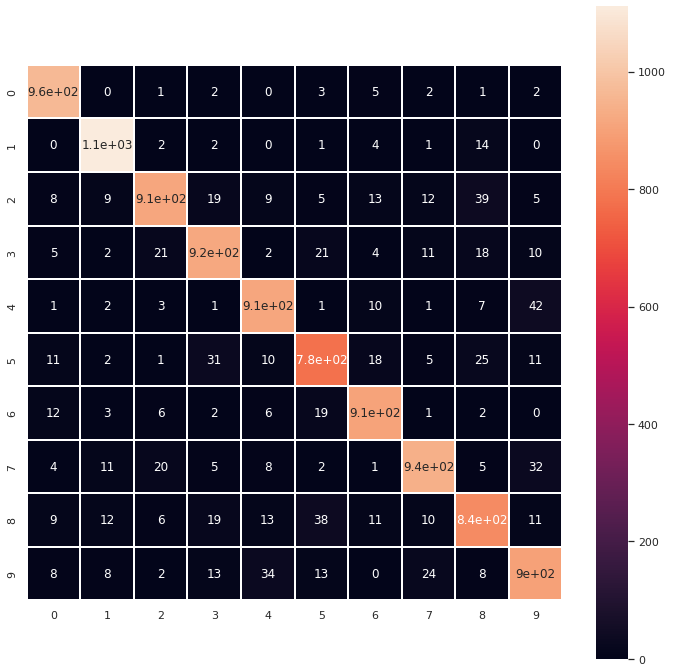

In [ ]:
sns.set(rc = {'figure.figsize':(12,12)})  #Edits size of chart
cm = confusion_matrix(testTrueLabels, testPredLabels)
sns.heatmap(cm, annot=True, linewidths=1, square=True)